In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [43]:
df = pd.DataFrame({'L' : ['31.5', '63', '125', '250', '500', '1000', '2000', '4000', '8000', 'Уровни звука'],
                    'Шумовой фон' : [66.5, 59.9, 48.2, 48.5, 41.3, 30.7, 26.0, 24.5, 25.8, 43.4],
                    'Источник без защиты' : [68.3, 65.4, 58.3, 74.7, 88.1, 93.2, 101.1, 73.2, 44.4, 102.7],
                    'Звукоизолирующий кожух' : [59.3, 56.7, 58.1, 68.2, 83.0, 92.8, 89.0, 65.5, 36.5, 94.7],
                    'Кожух (+ звукопоглотитель)' : [77.2, 67.2, 55.3, 59.5, 72.3, 76.5, 81.1, 52.4, 26.9, 83.2],
                    'Металл (алюминий)' : [60.5, 58.5, 59.3, 72.2, 83.9, 90.7, 91.9, 64.5, 33.6, 95.1],
                    'Металл с отверстием' : [71.3, 72.8, 67.1, 74.1, 85.0, 93.8, 99.6, 69.9, 41.7, 101.4],
                    'Фанера' : [65.5, 61.5, 62.0, 72.5, 84.5, 90.7, 91.7, 64.7, 34.1, 95.0],
                    'Металл с прорезями' : [74.9, 71.8, 62.8, 72.9, 84.5, 90.6, 92.5, 65.4, 34.1, 95.3],
                    'Экран и кожух (лучшие)' : [61.8, 58.5, 59.0, 52.7, 65.1, 71.0, 72.8, 45.9, 27.2, 75.8],
                    'Предельно допустимый уровень' : [86.0, 71.0, 61.0, 54.0, 49.0, 45.0, 42.0, 40.0, 38.0, 50.0]})

df

,L,Шумовой фон,Источник без защиты,Звукоизолирующий кожух,Кожух (+ звукопоглотитель),Металл (алюминий),Металл с отверстием,Фанера,Металл с прорезями,Экран и кожух (лучшие),Предельно допустимый уровень
0,31.5,66.5,68.3,59.3,77.2,60.5,71.3,65.5,74.9,61.8,86.0
1,63,59.9,65.4,56.7,67.2,58.5,72.8,61.5,71.8,58.5,71.0
2,125,48.2,58.3,58.1,55.3,59.3,67.1,62.0,62.8,59.0,61.0
3,250,48.5,74.7,68.2,59.5,72.2,74.1,72.5,72.9,52.7,54.0
4,500,41.3,88.1,83.0,72.3,83.9,85.0,84.5,84.5,65.1,49.0
5,1000,30.7,93.2,92.8,76.5,90.7,93.8,90.7,90.6,71.0,45.0
6,2000,26.0,101.1,89.0,81.1,91.9,99.6,91.7,92.5,72.8,42.0
7,4000,24.5,73.2,65.5,52.4,64.5,69.9,64.7,65.4,45.9,40.0
8,8000,25.8,44.4,36.5,26.9,33.6,41.7,34.1,34.1,27.2,38.0
9,Уровни звука,43.4,102.7,94.7,83.2,95.1,101.4,95.0,95.3,75.8,50.0


### Исследование зависимости параметров шумовой помехи

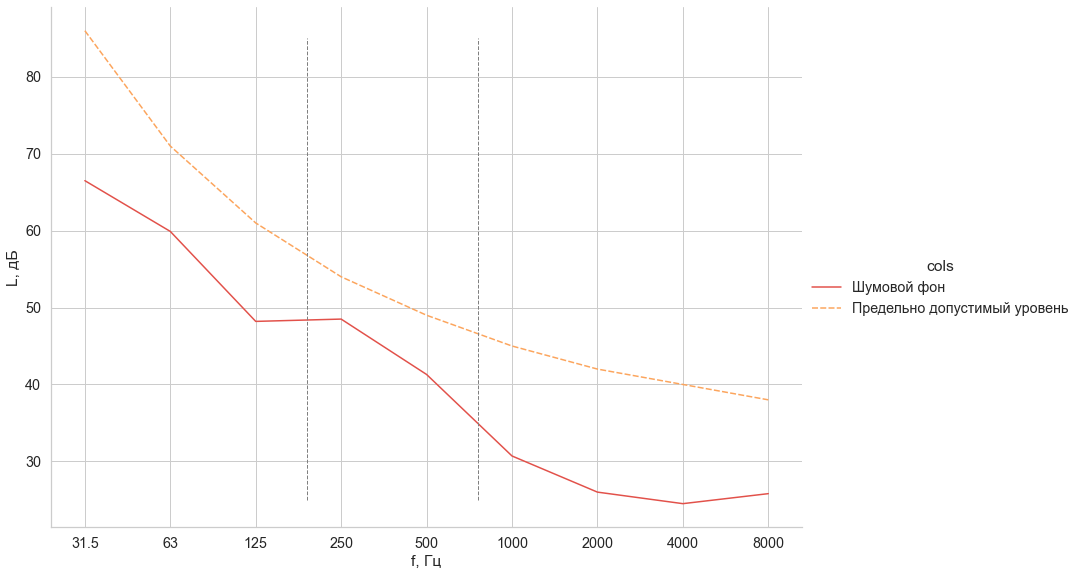

In [6]:
df2 = df[:-1].melt(id_vars='L', value_vars=['Шумовой фон', 'Предельно допустимый уровень'], var_name='cols',  value_name='vals')
sns.set_theme(style="whitegrid", palette='Spectral', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df2, x='L', y='vals', hue='cols', style='cols',
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels("f, Гц", "L, дБ")
plt.vlines(2.6, 25, 85, linestyle='--', color='gray', linewidth=1)
plt.vlines(4.6, 25, 85, linestyle='--', color='gray', linewidth=1)
plt.savefig('pics/1.png')
plt.show()

### Исследование зависимости параметров шума от частоты

In [7]:
df_diff = abs(df['Шумовой фон'] - df['Источник без защиты'])
df_diff = np.ceil(df_diff.where(df_diff < 10, 10))
df_diff

0     2.0
1     6.0
2    10.0
3    10.0
4    10.0
5    10.0
6    10.0
7    10.0
8    10.0
9    10.0
dtype: float64

In [8]:
d = {1: -7, 2: -5, 3: -3, 4: -2, 5: -2, 6: -1, 7: -1, 8: -1, 9: -1, 10: 0}
cor = [d[val] for val in df_diff.values]
cor

[-5, -1, 0, 0, 0, 0, 0, 0, 0, 0]

In [9]:
df_copy = df.copy()
df_copy['С поправкой на шум'] = df_copy['Источник без защиты'] + cor
df_copy['С поправкой на шум']

0     63.3
1     64.4
2     58.3
3     74.7
4     88.1
5     93.2
6    101.1
7     73.2
8     44.4
9    102.7
Name: С поправкой на шум, dtype: float64

In [10]:
df_copy = df_copy[:-1].melt(id_vars='L', value_vars=['Шумовой фон', 'Источник без защиты', 
                                                     'Предельно допустимый уровень', 'С поправкой на шум'], 
                            var_name='cols',  value_name='vals')

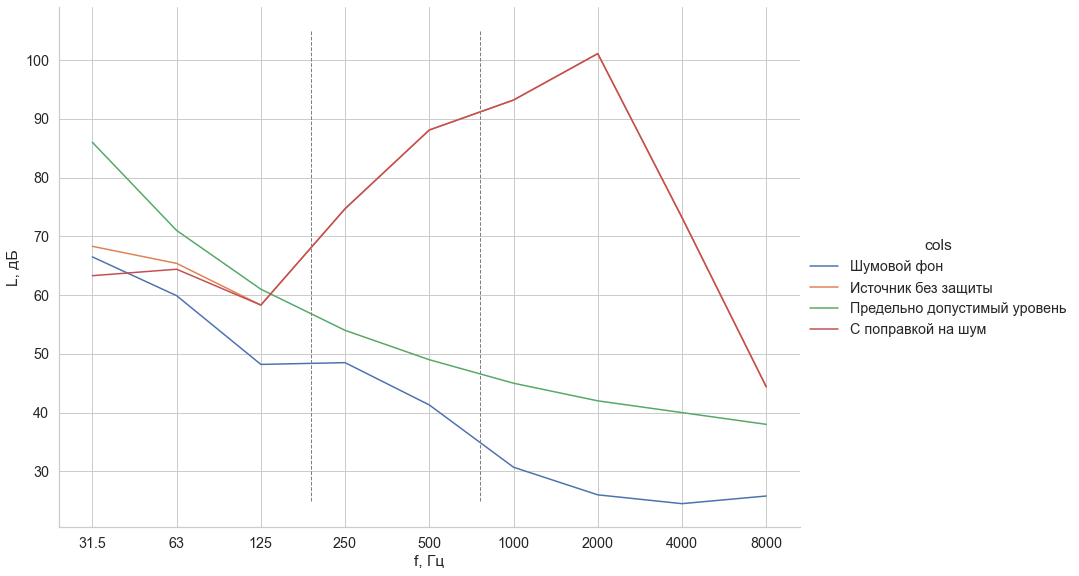

In [11]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_copy, x='L', y='vals', hue='cols',
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels("f, Гц", "L, дБ")
plt.vlines(2.6, 25, 105, linestyle='--', color='gray', linewidth=1)
plt.vlines(4.6, 25, 105, linestyle='--', color='gray', linewidth=1)
plt.savefig('pics/2.png')
plt.show()

### Исследование средств защиты от шума

In [12]:
df_copy2 = df.copy()

In [13]:
df_copy2 = df_copy2[:-1].melt(id_vars='L', value_vars=['Источник без защиты', 'Звукоизолирующий кожух', 'Кожух (+ звукопоглотитель)',
                                                       'Металл (алюминий)', 'Металл с отверстием', 'Фанера',
                                                       'Металл с прорезями', 'Экран и кожух (лучшие)', 
                                                       'Предельно допустимый уровень'], 
                              var_name='cols',  value_name='vals')

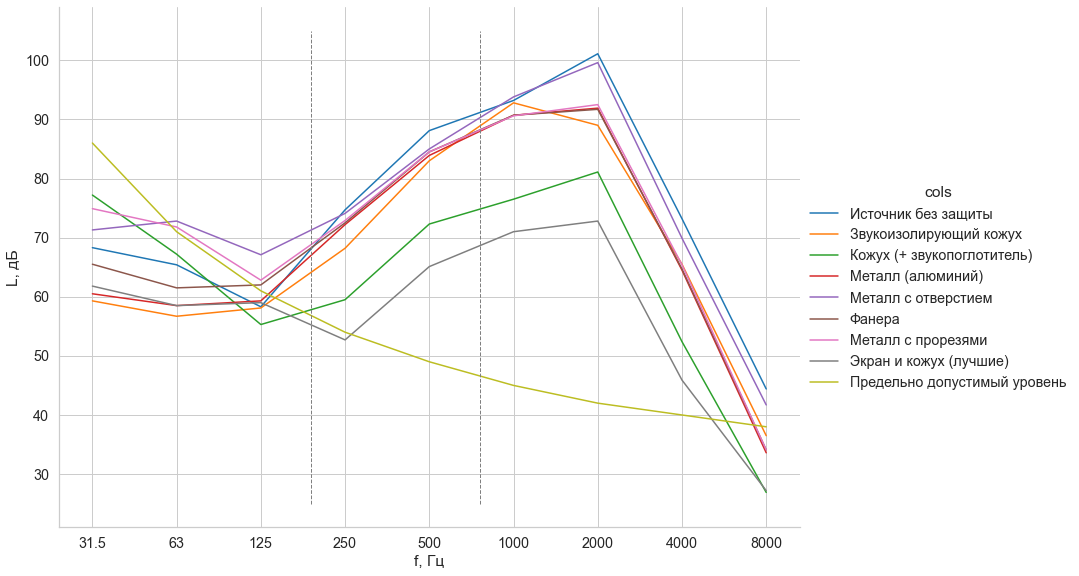

In [14]:
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_copy2, x='L', y='vals', hue='cols',
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels("f, Гц", "L, дБ")
plt.vlines(2.6, 25, 105, linestyle='--', color='gray', linewidth=1)
plt.vlines(4.6, 25, 105, linestyle='--', color='gray', linewidth=1)
plt.savefig('pics/3.png')
plt.show()

In [15]:
df_copy3 = df.copy()
valrs = ['Звукоизолирующий кожух', 'Кожух (+ звукопоглотитель)', 'Металл (алюминий)', 'Металл с отверстием', 'Фанера', 'Металл с прорезями', 'Экран и кожух (лучшие)']
for i in valrs:
    df_copy3[i] = df_copy3['Источник без защиты'] - df_copy3[i]  
df_copy3

,L,Шумовой фон,Источник без защиты,Звукоизолирующий кожух,Кожух (+ звукопоглотитель),Металл (алюминий),Металл с отверстием,Фанера,Металл с прорезями,Экран и кожух (лучшие),Предельно допустимый уровень
0,31.5,66.5,68.3,9.0,-8.9,7.8,-3.0,2.8,-6.6,6.5,86.0
1,63,59.9,65.4,8.7,-1.8,6.9,-7.4,3.9,-6.4,6.9,71.0
2,125,48.2,58.3,0.2,3.0,-1.0,-8.8,-3.7,-4.5,-0.7,61.0
3,250,48.5,74.7,6.5,15.2,2.5,0.6,2.2,1.8,22.0,54.0
4,500,41.3,88.1,5.1,15.8,4.2,3.1,3.6,3.6,23.0,49.0
5,1000,30.7,93.2,0.4,16.7,2.5,-0.6,2.5,2.6,22.2,45.0
6,2000,26.0,101.1,12.1,20.0,9.2,1.5,9.4,8.6,28.3,42.0
7,4000,24.5,73.2,7.7,20.8,8.7,3.3,8.5,7.8,27.3,40.0
8,8000,25.8,44.4,7.9,17.5,10.8,2.7,10.3,10.3,17.2,38.0
9,Уровни звука,43.4,102.7,8.0,19.5,7.6,1.3,7.7,7.4,26.9,50.0


In [16]:
df_copy3_plus = round(df_copy3.iloc[:9, [0,3,4,5,6,7,8,9]], 1)
df_copy3_plus.to_dict('list')

{'L': ['31.5', '63', '125', '250', '500', '1000', '2000', '4000', '8000'],
 'Звукоизолирующий кожух': [9.0, 8.7, 0.2, 6.5, 5.1, 0.4, 12.1, 7.7, 7.9],
 'Кожух (+ звукопоглотитель)': [-8.9,
  -1.8,
  3.0,
  15.2,
  15.8,
  16.7,
  20.0,
  20.8,
  17.5],
 'Металл (алюминий)': [7.8, 6.9, -1.0, 2.5, 4.2, 2.5, 9.2, 8.7, 10.8],
 'Металл с отверстием': [-3.0, -7.4, -8.8, 0.6, 3.1, -0.6, 1.5, 3.3, 2.7],
 'Фанера': [2.8, 3.9, -3.7, 2.2, 3.6, 2.5, 9.4, 8.5, 10.3],
 'Металл с прорезями': [-6.6, -6.4, -4.5, 1.8, 3.6, 2.6, 8.6, 7.8, 10.3],
 'Экран и кожух (лучшие)': [6.5,
  6.9,
  -0.7,
  22.0,
  23.0,
  22.2,
  28.3,
  27.3,
  17.2]}

In [17]:
df_copy3 = df_copy3[:-1].melt(id_vars='L', value_vars=valrs, 
                              var_name='cols',  value_name='vals')

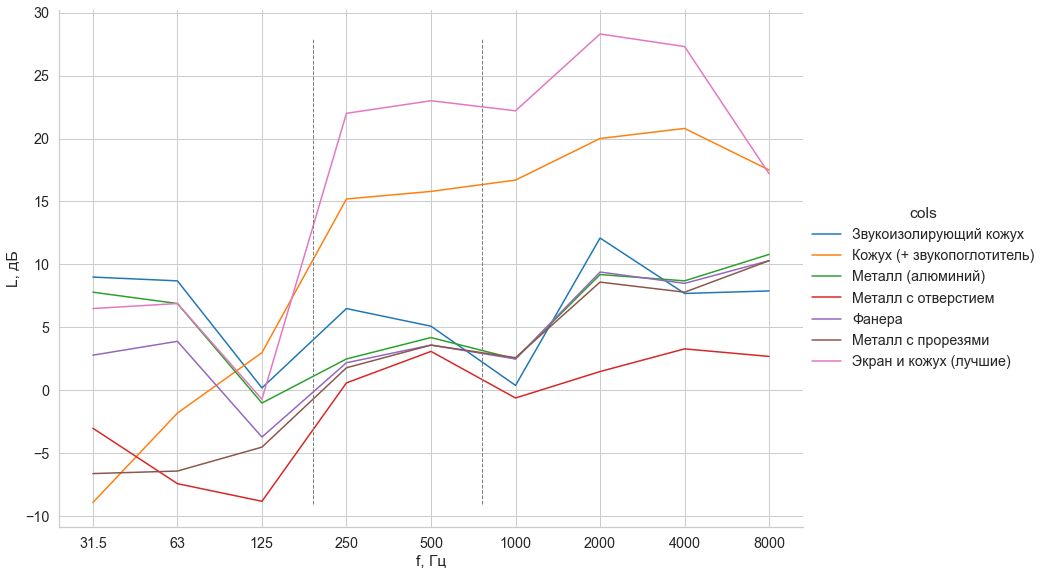

In [18]:
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_copy3, x='L', y='vals', hue='cols',
                 kind='line', height=8.27, aspect=11.7/8.27)    
ax.set_axis_labels("f, Гц", "L, дБ")
plt.vlines(2.6, -9, 28, linestyle='--', color='gray', linewidth=1)
plt.vlines(4.6, -9, 28, linestyle='--', color='gray', linewidth=1)
plt.savefig('pics/4.png')
plt.show()

In [19]:
def prot_plots(num, name):
    df_copy_a = df[:-1].melt(id_vars='L', value_vars=['Предельно допустимый уровень',
                                                      'Источник без защиты',
                                                       name], 
                              var_name='cols',  value_name='vals')
    sns.set_theme(style="whitegrid", palette='bright', context='notebook', font_scale=1.3)
    ax_f = sns.relplot(data=df_copy_a, x='L', y='vals', hue='cols',
                     kind='line', height=8.27, aspect=11.7/8.27)    
    ax_f.set_axis_labels("f, Гц", "L, дБ")
    if num == 1:
        plt.vlines(2.6, 25, 105, linestyle='--', color='gray', linewidth=1)
        plt.vlines(4.6, 25, 105, linestyle='--', color='gray', linewidth=1)
    else:
        plt.vlines(2.6, 35, 105, linestyle='--', color='gray', linewidth=1)
        plt.vlines(4.6, 35, 105, linestyle='--', color='gray', linewidth=1)
    plt.savefig(f'pics/{num+5}.png')
    plt.show()

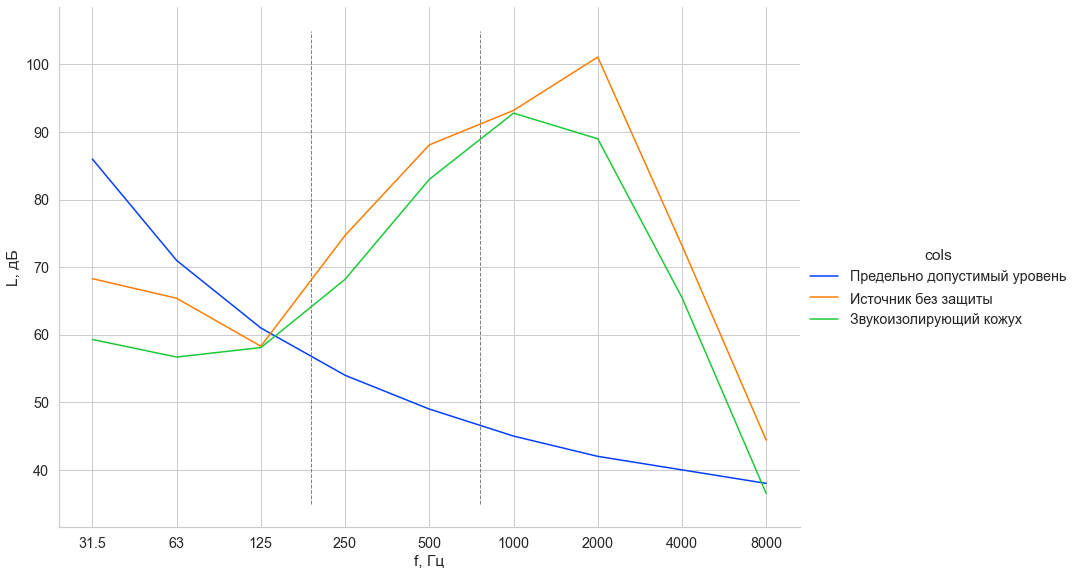

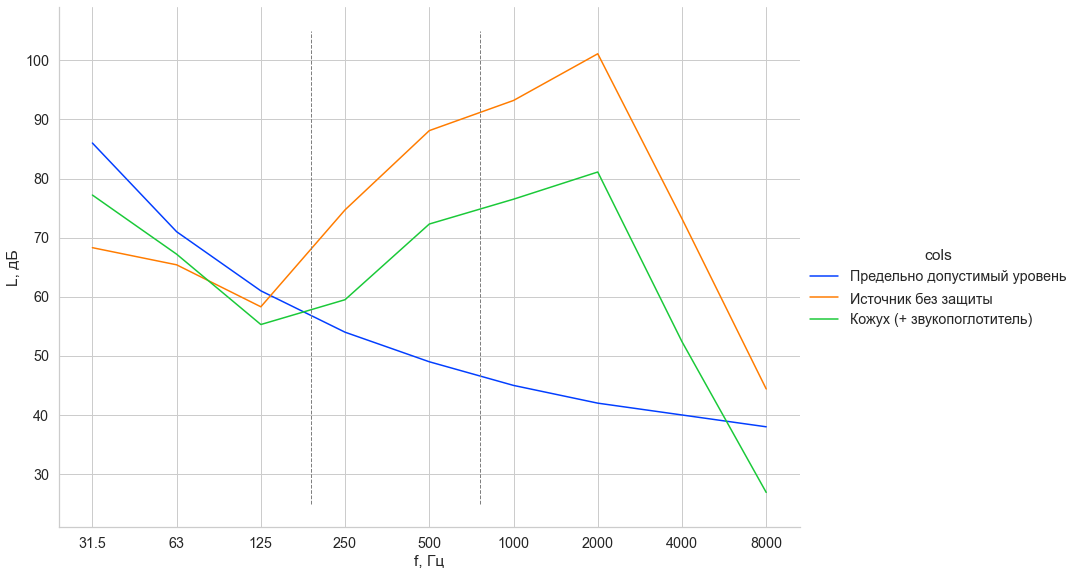

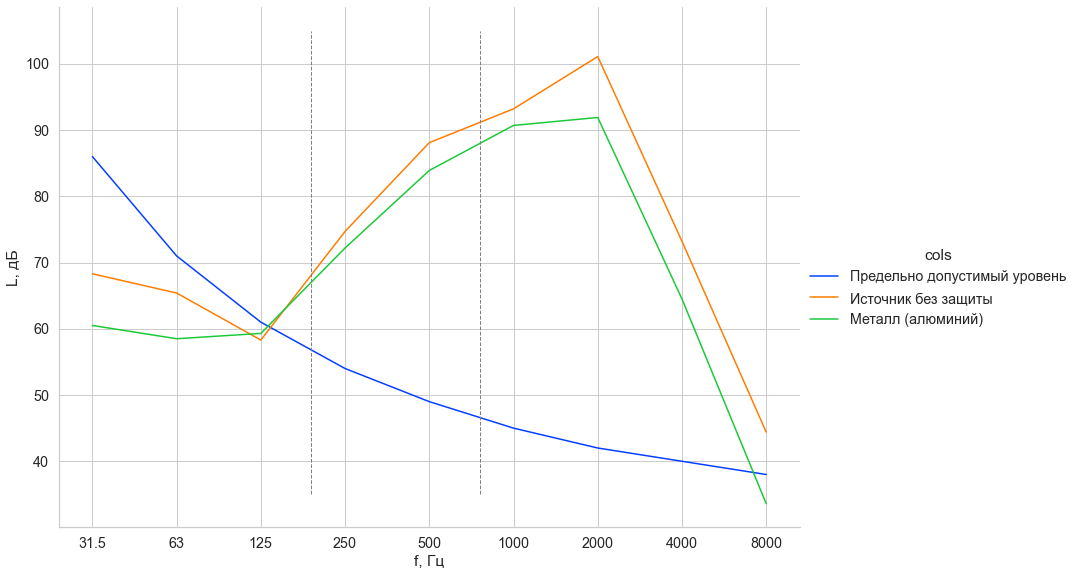

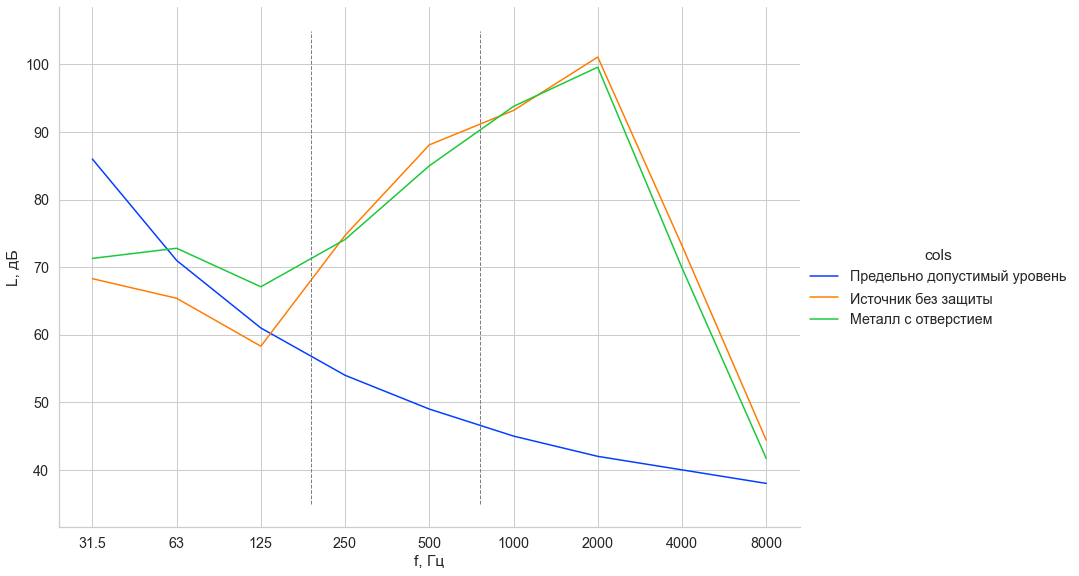

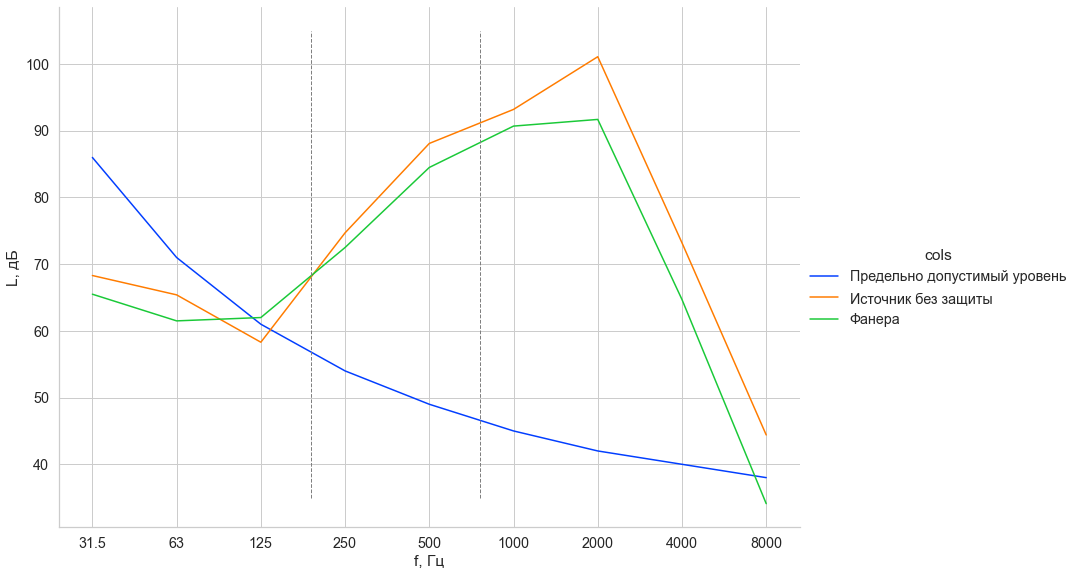

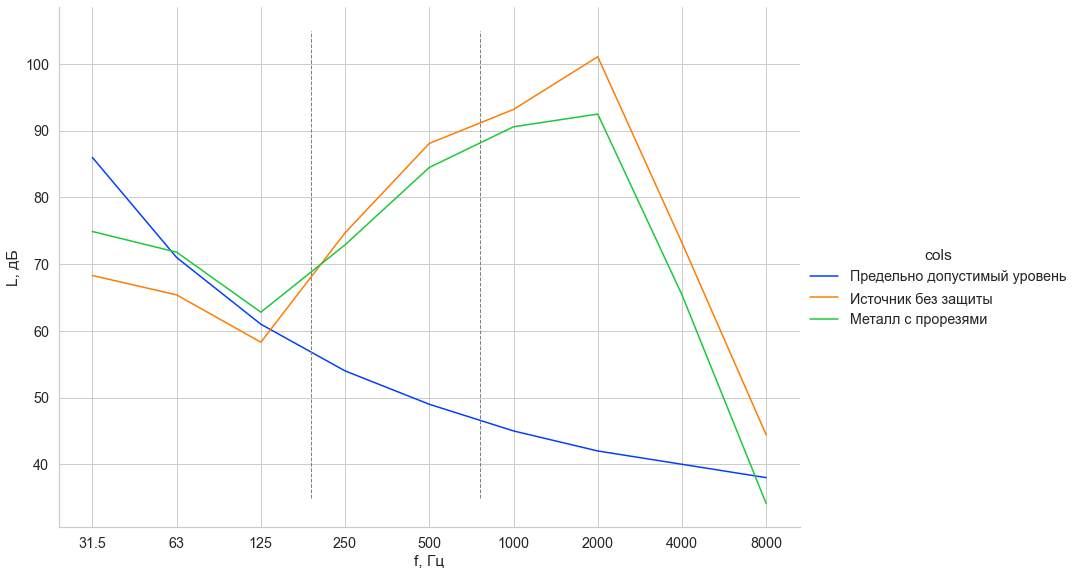

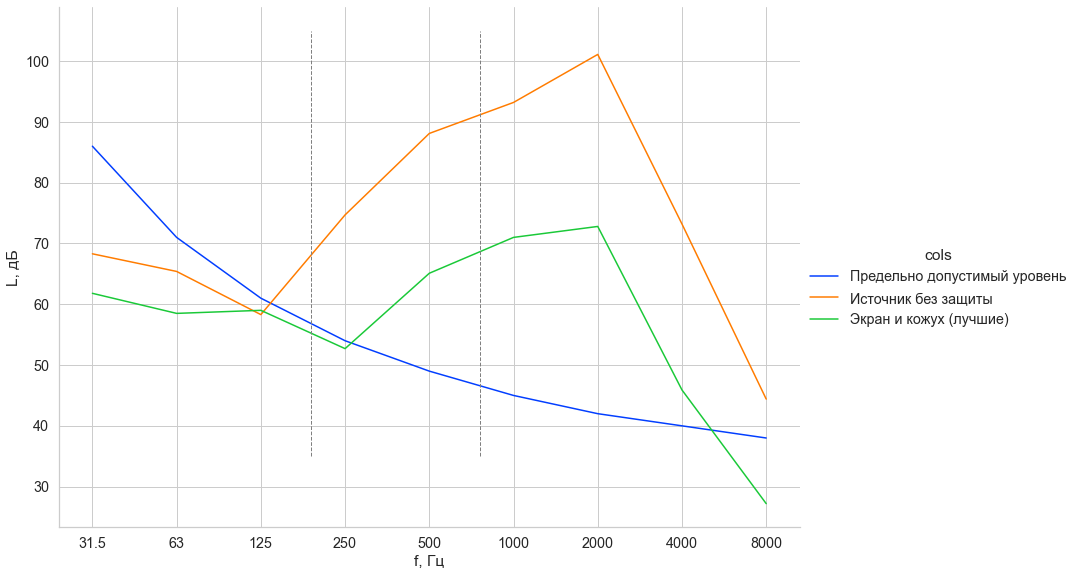

In [20]:
for i, v in enumerate(valrs):
    prot_plots(i, v)

### Исследование

In [21]:
# L_iz = [float(i) for i in df_iz.iloc[:, 0].values.tolist()]
L_iz = np.arange(31.5, 8000)
A_iz = [1*(20*np.log10(8.1*i)-60) for i in L_iz]
F_iz = [1*(20*np.log10(6.5*i)-60) for i in L_iz]
# A_iz2 = [(20*np.log10(5.4*i)-10*np.log10((2*i*0.0004)/(np.pi*5900))-47-50) for i in L_iz]
# F_iz2 = [(20*np.log10(2.6*i)-10*np.log10((2*i*0.0058)/(np.pi*4750))-47-50) for i in L_iz]
df_iz = pd.DataFrame({'L': L_iz, 'Алюминий': A_iz, 'Фанера': F_iz})
df_iz_m = df_iz.melt(id_vars='L', var_name='Материал', value_name='vals')

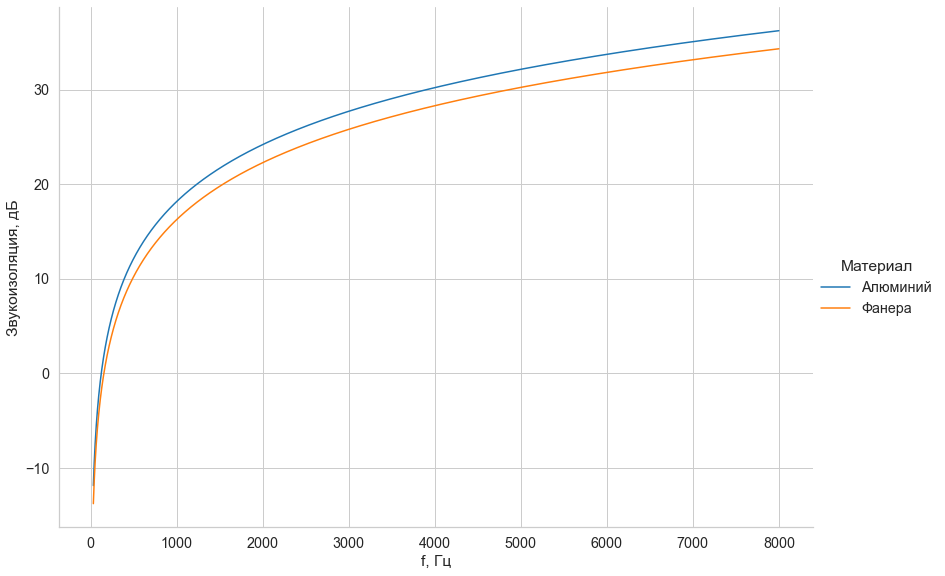

In [22]:
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_iz_m, x='L', y='vals', hue='Материал',
                 kind='line', height=8.27, aspect=11.7/8.27)    
ax.set_axis_labels("f, Гц", "Звукоизоляция, дБ")
plt.savefig('pics/20.png')
plt.show()

In [23]:
for i in range(len(df_iz['Алюминий'])):
    df_iz['Алюминий'][i] = (50 - df_iz['Алюминий'][i]) if df_iz['Алюминий'][i] > 0 else 50
for i in range(len(df_iz['Фанера'])):
    df_iz['Фанера'][i] = (50 - df_iz['Фанера'][i]) if df_iz['Фанера'][i] > 0 else 50
df_iz_m = df_iz.melt(id_vars='L', var_name='Материал', value_name='vals')

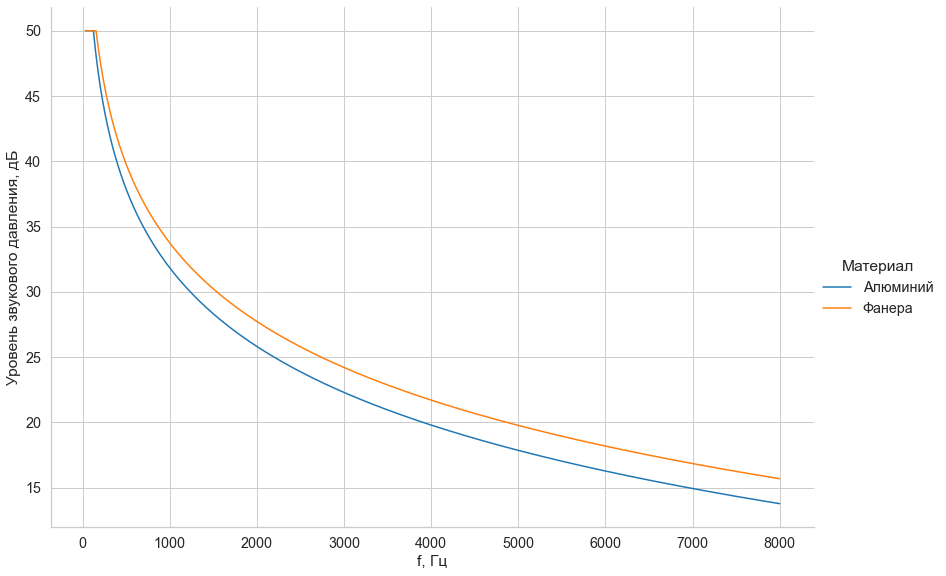

In [24]:
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_iz_m, x='L', y='vals', hue='Материал',
                 kind='line', height=8.27, aspect=11.7/8.27)    
ax.set_axis_labels("f, Гц", "Уровень звукового давления, дБ")
plt.savefig('pics/21.png')
plt.show()

In [25]:
L_ecr = np.arange(31.5, 8000)
A_ecr = [1*(20*np.log10(8.1*i)-60) for i in L_ecr]
one_ecr = [(10 * np.log10((40 * ((0.4 * i) / 343)) - 10) - 10 * np.log10(1)) for i in L_ecr]
df_ecr = pd.DataFrame({'L': L_ecr, 'Алюминий': A_ecr, 'Экран с окном': one_ecr})
df_ecr_m = df_ecr.melt(id_vars='L', value_vars='Экран с окном', var_name='Материал', value_name='vals')

<ipython-input-25-215375ea0a8b>:3: RuntimeWarning: invalid value encountered in log10
  one_ecr = [(10 * np.log10((40 * ((0.4 * i) / 343)) - 10) - 10 * np.log10(1)) for i in L_ecr]


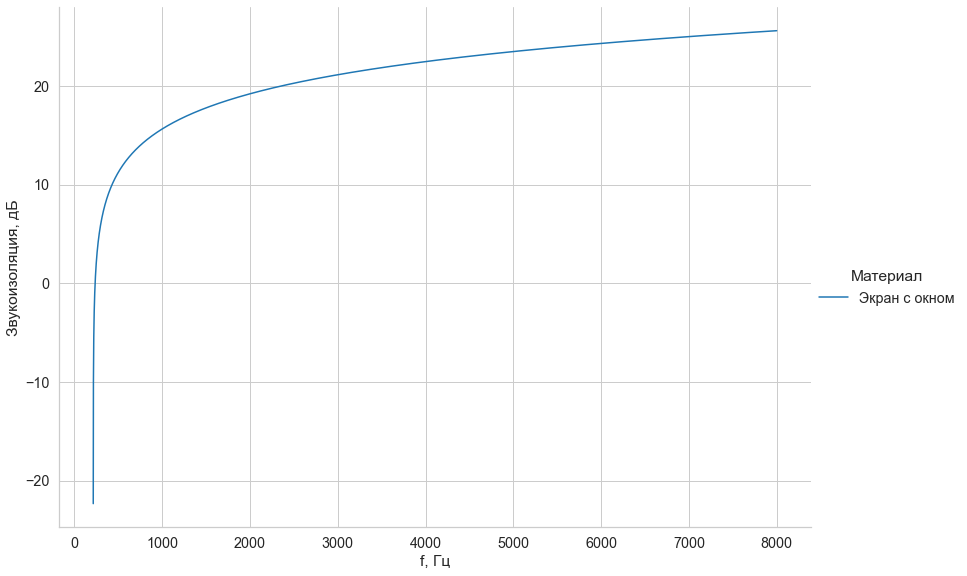

In [26]:
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_ecr_m, x='L', y='vals', hue='Материал',
                 kind='line', height=8.27, aspect=11.7/8.27)    
ax.set_axis_labels("f, Гц", "Звукоизоляция, дБ")
plt.savefig('pics/30.png')
plt.show()

In [27]:
for i in range(len(df_ecr['Алюминий'])):
    df_ecr['Алюминий'][i] = (50 - df_ecr['Алюминий'][i]) if df_ecr['Алюминий'][i] > 0 else 50
for i in range(len(df_ecr['Экран с окном'])):
    df_ecr['Экран с окном'][i] = (50 - df_ecr['Экран с окном'][i]) if df_ecr['Экран с окном'][i] > 0 else 50
df_ecr_m = df_ecr.melt(id_vars='L', var_name='Материал', value_name='vals')

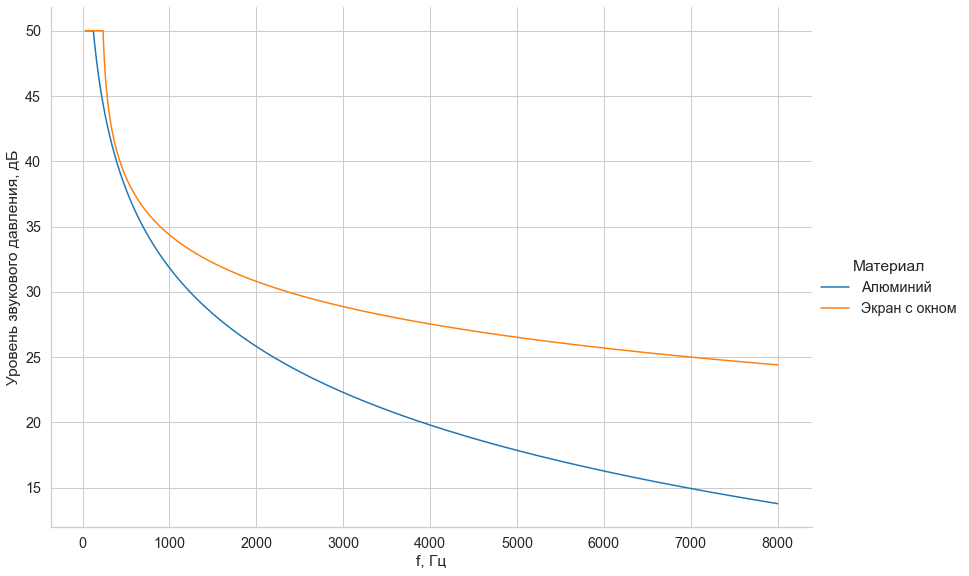

In [28]:
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_ecr_m, x='L', y='vals', hue='Материал',
                 kind='line', height=8.27, aspect=11.7/8.27)    
ax.set_axis_labels("f, Гц", "Уровень звукового давления, дБ")
plt.savefig('pics/31.png')
plt.show()

In [29]:
def delta_iz(x):
    a = 1+(10**(0.1*x))*0.04
    return 10*np.log10(a/1.04)

In [30]:
L_iz = np.arange(31.5, 8000)
A_iz = [(20*np.log10(8.1*i)-60) for i in L_iz]
Delta_iz = [delta_iz(i) for i in A_iz]
df_iz = pd.DataFrame({'L': L_iz, 'Экран с прорезями': Delta_iz})
df_iz_m = df_iz.melt(id_vars='L', var_name='Материал', value_name='vals')

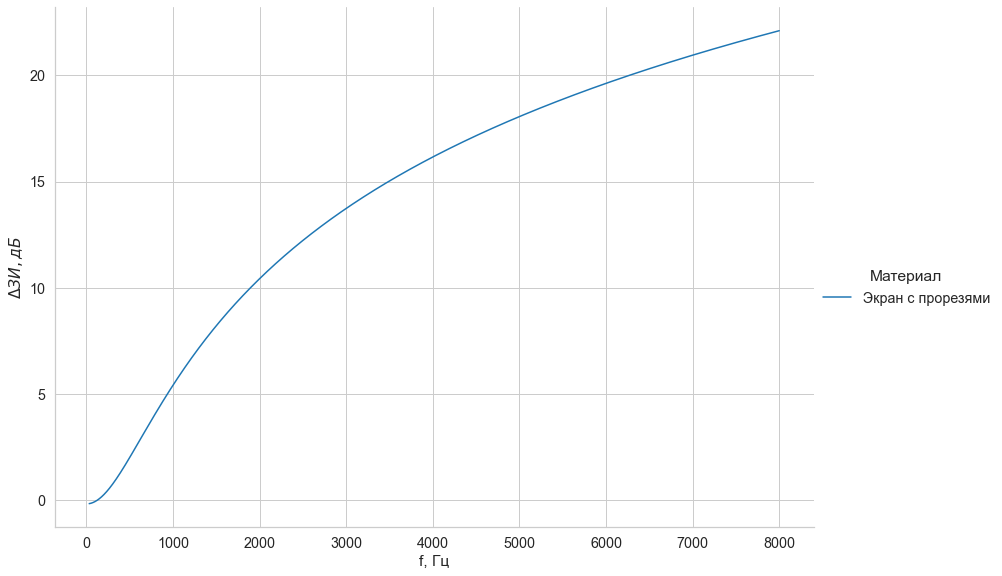

In [31]:
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_iz_m, x='L', y='vals', hue='Материал',
                 kind='line', height=8.27, aspect=11.7/8.27)    
ax.set_axis_labels("f, Гц", r'$\Delta ЗИ, дБ$')
plt.savefig('pics/40.png')
plt.show()

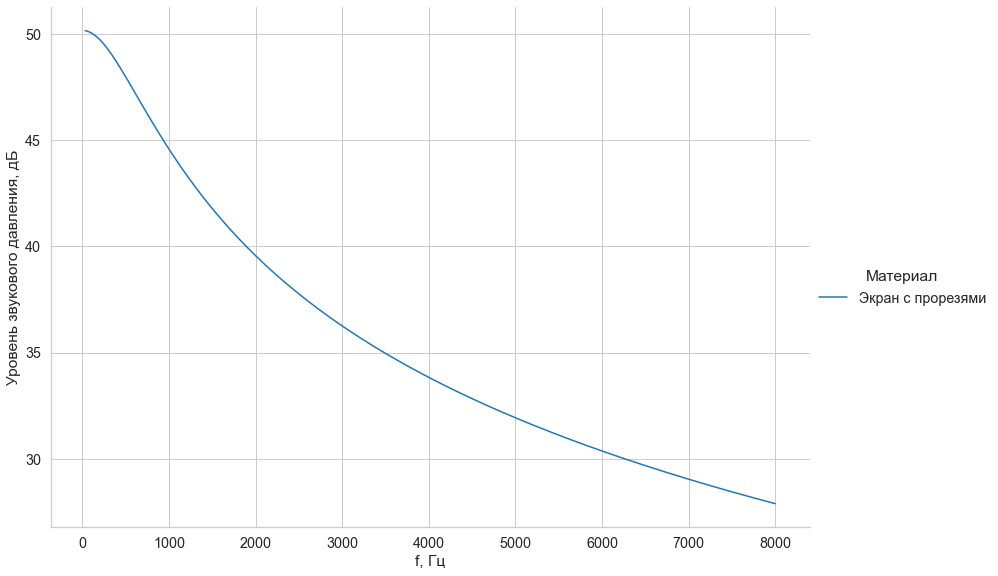

In [32]:
for i in range(len(df_iz['Экран с прорезями'])):
    df_iz['Экран с прорезями'][i] = (50 - df_iz['Экран с прорезями'][i])
df_iz_m = df_iz.melt(id_vars='L', var_name='Материал', value_name='vals')
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_iz_m, x='L', y='vals', hue='Материал',
                 kind='line', height=8.27, aspect=11.7/8.27)    
ax.set_axis_labels("f, Гц", "Уровень звукового давления, дБ")
plt.savefig('pics/41.png')
plt.show()

In [33]:
L = [str(i) for i in df[:-1].iloc[:, 0].values.tolist()]
P = [50, 50, 50, 40, 30, 20, 10, 0, 0]
df_pog = pd.DataFrame({'L': L, 'Звукопоглотитель': P})
df_pog_m = df_pog.melt(id_vars='L', var_name='Материал', value_name='vals')

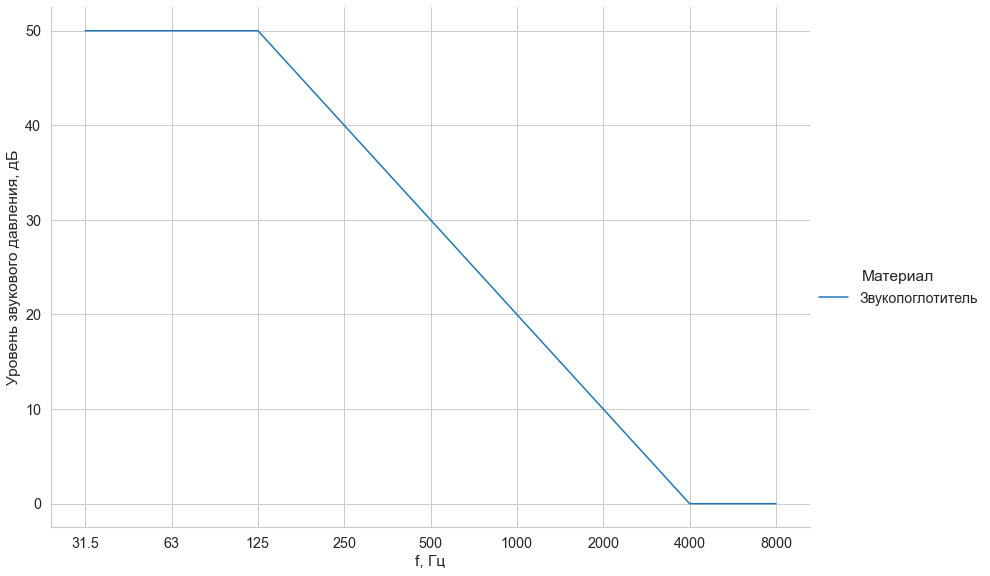

In [34]:
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_pog_m, x='L', y='vals', hue='Материал',
                 kind='line', height=8.27, aspect=11.7/8.27)    
# plt.scatter(7, 0, s=100, facecolors='none', edgecolors='r')  
ax.set_axis_labels("f, Гц", "Уровень звукового давления, дБ")
ax.set(xticks=L)
plt.savefig('pics/50.png')
plt.show()

## Собственные варианты

### Первый

In [35]:
L = np.arange(31.5, 8000)
S = [20*np.log10(52.5*i)-60 for i in L]
df_s1 = pd.DataFrame({'L': L, 'Серебро': S})
df_s1_m = df_s1.melt(id_vars='L', var_name='Материал', value_name='vals')

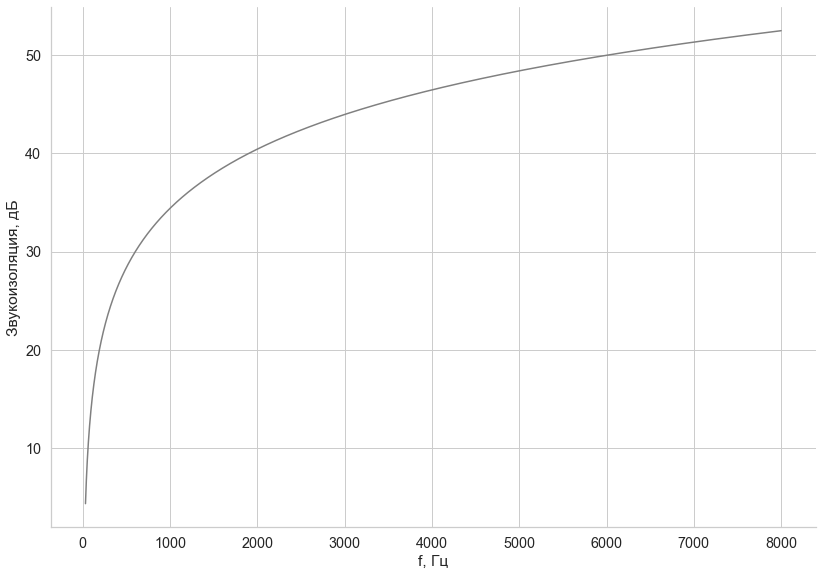

In [36]:
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_s1_m, x='L', y='vals', color='grey',
                 kind='line', height=8.27, aspect=11.7/8.27, )    
ax.set_axis_labels("f, Гц", "Звукоизоляция, дБ")
plt.savefig('pics/101.png')
plt.show()

In [37]:
for i in range(len(df_s1['Серебро'])):
    df_s1['Серебро'][i] = (60 - df_s1['Серебро'][i]) if df_s1['Серебро'][i] > 0 else 60
df_s1_m = df_s1.melt(id_vars='L', var_name='Материал', value_name='vals')

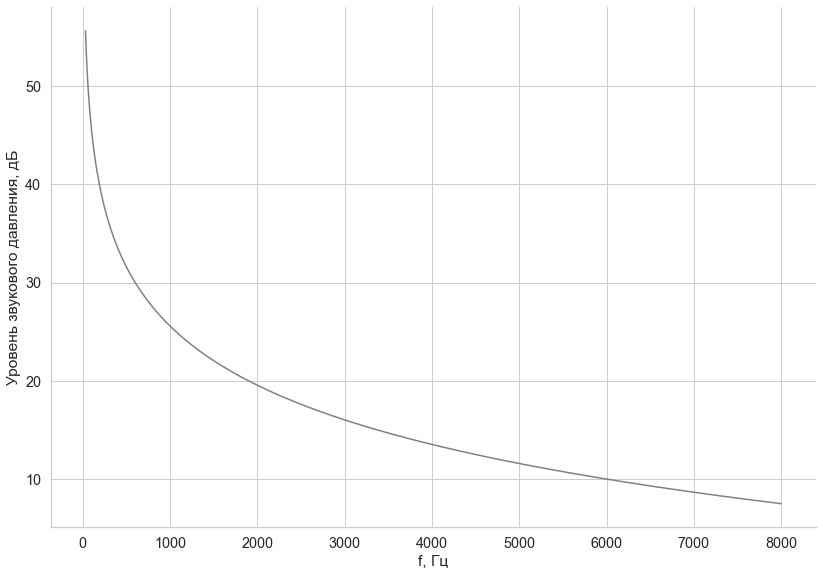

In [38]:
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_s1_m, x='L', y='vals', kind='line', 
                 height=8.27, aspect=11.7/8.27, color='grey')    
ax.set_axis_labels("f, Гц", "Уровень звукового давления, дБ")
plt.savefig('pics/102.png')
plt.show()

### Второй

In [39]:
L = np.arange(31.5, 8000)
S = [20*np.log10(7.5*i)-47 + 20*np.log10(15*i) - 47 + 20*np.log10(85*0.1) - 29 for i in L]
S_cel = [20*np.log10(22.5*i) - 48 for i in L]

In [40]:
df_s1 = pd.DataFrame({'L': L, 'Два стекла с полостью': S, 'Цельная панель' : S_cel})
df_s1_m = df_s1.melt(id_vars='L', var_name='Конструкция', value_name='vals')

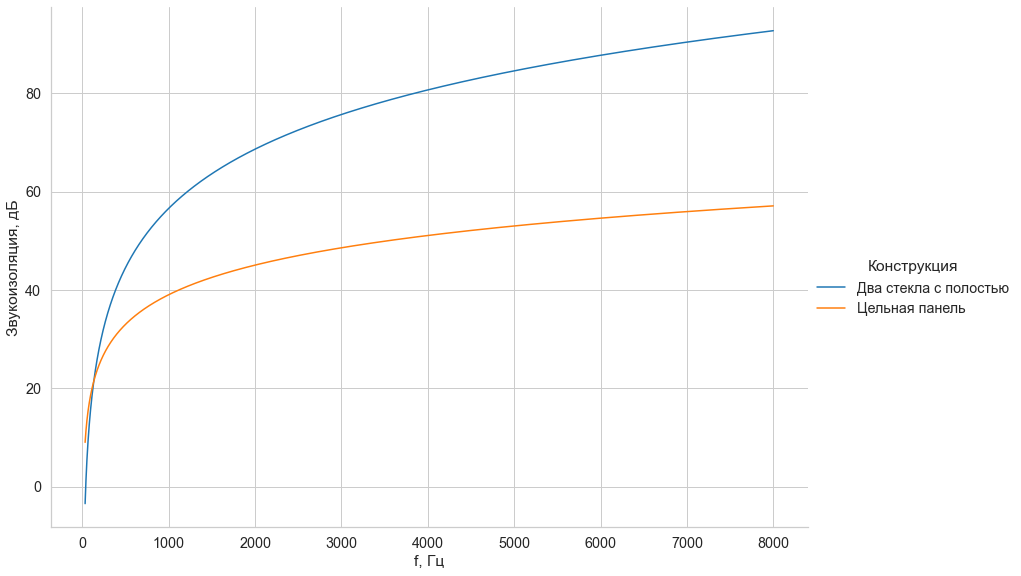

In [41]:
sns.set_theme(style="whitegrid", palette='tab10', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df_s1_m, x='L', y='vals', hue='Конструкция',
                 kind='line', height=8.27, aspect=11.7/8.27, )    
ax.set_axis_labels("f, Гц", "Звукоизоляция, дБ")
plt.savefig('pics/103.png')
plt.show()